<a href="https://colab.research.google.com/github/Deepthi-01997264/cs480student/blob/main/Assignment_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# In this assignment, we will explore the Imaging Data Commons,
# a new service from the National Cancer Institute.
#
# We will find and explore a PET dataset and then perform a MIP reconstruction.

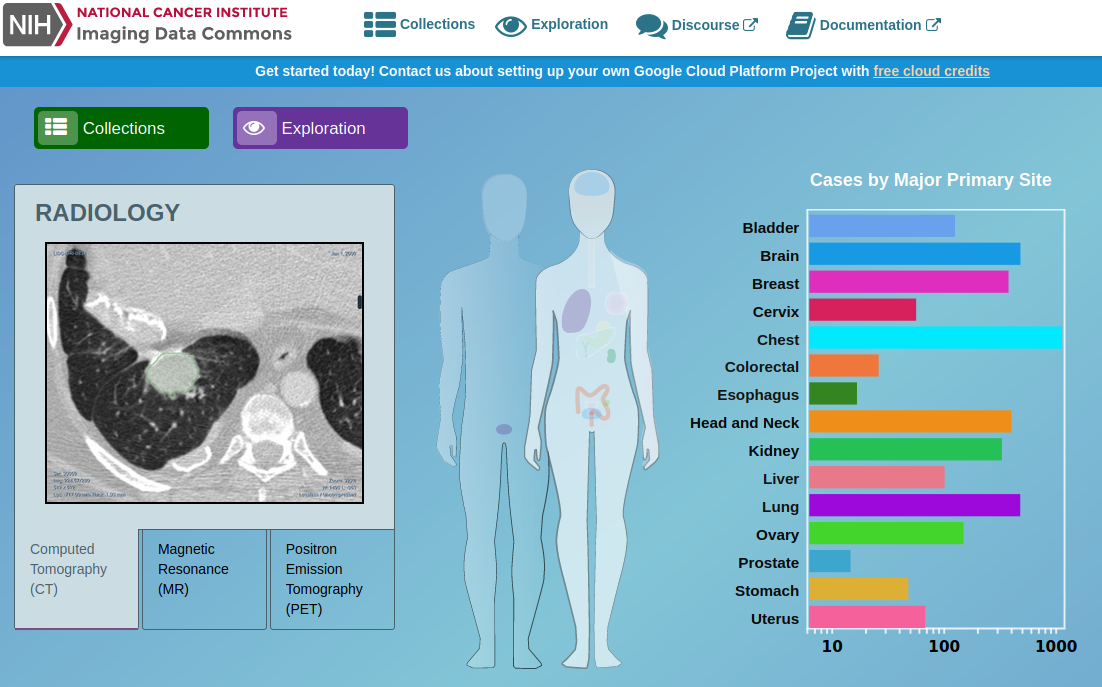

**Task 1**: Browse the IDC datasets and find a combined CT or MRI with PET! [15 Points]

In [ ]:
#
# Visit https://portal.imaging.datacommons.cancer.gov/ and find a dataset
# that includes structural imaging such as CT or MRI combined with a PET scan.
#
# You can start by selecting the type of a cancer case such as Bladder, Brain etc.
# Hint: Head and Neck include many PET scans.
#

In [ ]:
# TODO: Open the integrated OHIF viewer to view the data.
#
# 1) Select a collection, then a case, then a study in the IDC interface.
# 2) To open the OHIF viewer, click on the view icon.
# 3) Paste a screenshot of the viewer after the data was loaded below.
#

TODO: Add screenshot

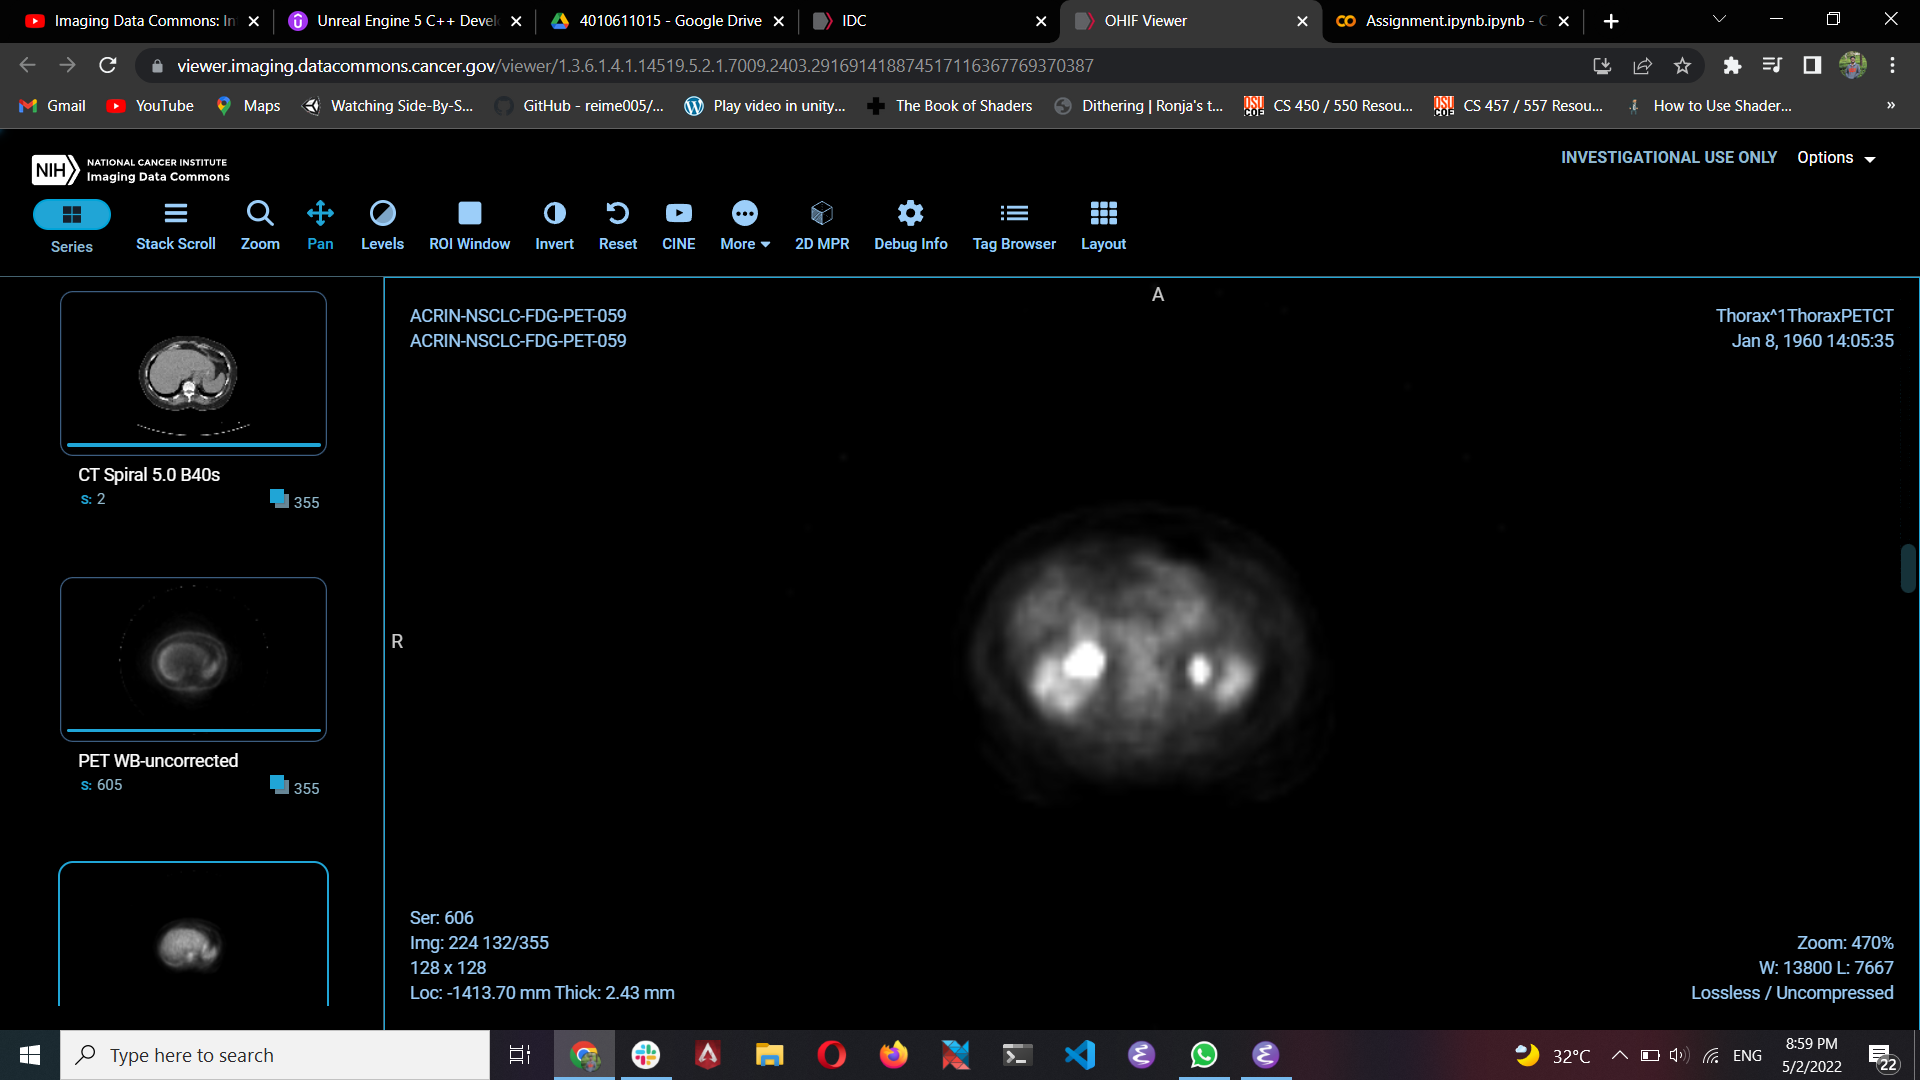

**Task 2**: Visualize structural and PET side-by-side! [30 Points]

In [ ]:
# In the OHIF viewer, please change the layout to show the structural image
# next to the PET scan.
#
# TODO: Use the LAYOUT functionality in the toolbar to switch to a 2-column layout.

In [ ]:
# TODO: Find the cancerous lesion.
#
# 1) Navigate through the PET image to find the cancerous lesion.

In [ ]:
# TODO: Sync the structural scan (CT or MR) to the PET scan with the lesion.
#
# Hint: The "Loc" label in the bottom left of both scans should roughly match.
# Hint 2: The Levels tool allows Window/Level adjustment to increase contrast.
#

In [ ]:
# TODO: Paste a screenshot showing the 2-column layout below.

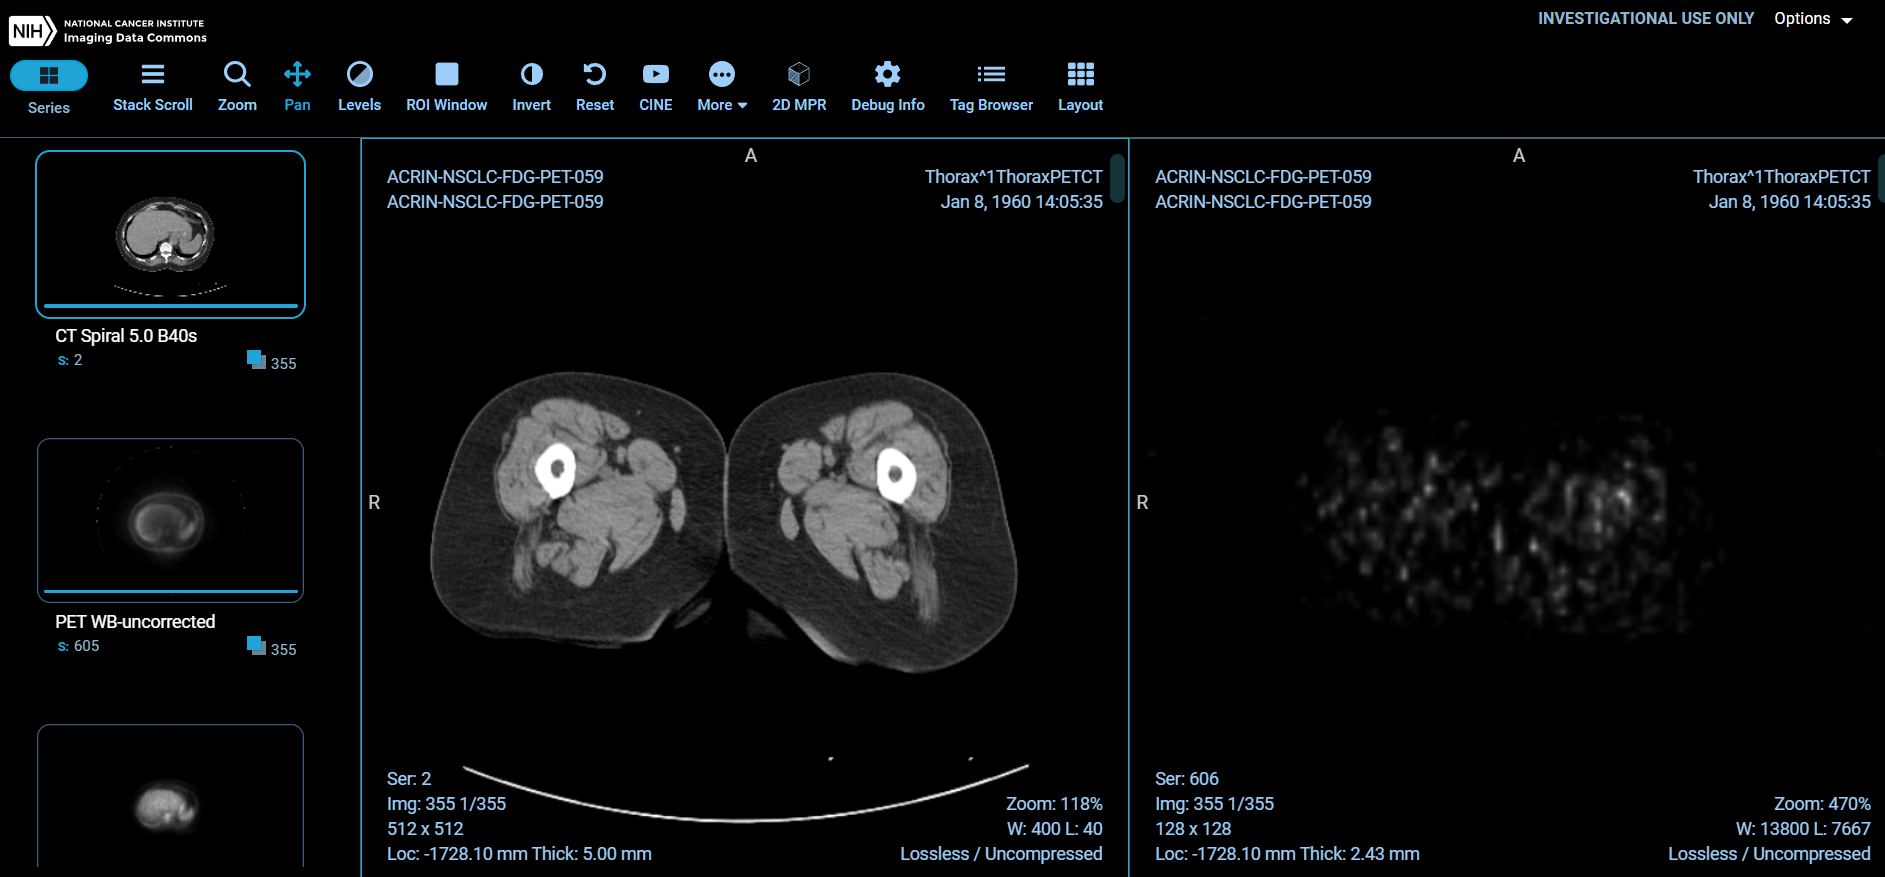

TODO: Add screenshot

**Task 3**: Use an MIP to reslice the PET scan! [35 Points]

In [ ]:
# We will now use the 2D MPR functionality to look at the lesion from different
# orientations.
#
# Hint: This works best in Google Chrome.

In [ ]:
# Question 1): What is MPR?


In [1]:
# TODO: YOUR ANSWER
'''MPR stands for Multi-Planar Reconstruction. This is a process by which we convert image data from one plane to another. For example from the axial plane to non-axial planes such as coronal, sagittal or oblique.'''

'MPR stands for Multi-Planar Reconstruction. This is a process by which we convert image data from one plane to another. For example from the axial plane to non-axial planes such as coronal, sagittal or oblique.'

In [ ]:
# Question 2): What is the difference between MIP, MinIP, AvgIP?
#

In [2]:
# TODO: YOUR ANSWER
'''MIP: Maximum Instensity Projection use maximum value of a given voxel for visualization.
# MinIP: Minimum Instensity Projection use minimum value of a given voxel for visualization.
# AvgP: Average Instensity Projection calculates average/mean value of a given voxel for visualization.'''

'MIP: Maximum Instensity Projection use maximum value of a given voxel for visualization.\n# MinIP: Minimum Instensity Projection use minimum value of a given voxel for visualization.\n# AvgP: Average Instensity Projection calculates average/mean value of a given voxel for visualization.'

In [ ]:
# Now, please navigate to the lesion in all 3 orientations.
#
# TODO: Paste a screenshot below.
#

TODO: Add screenshot

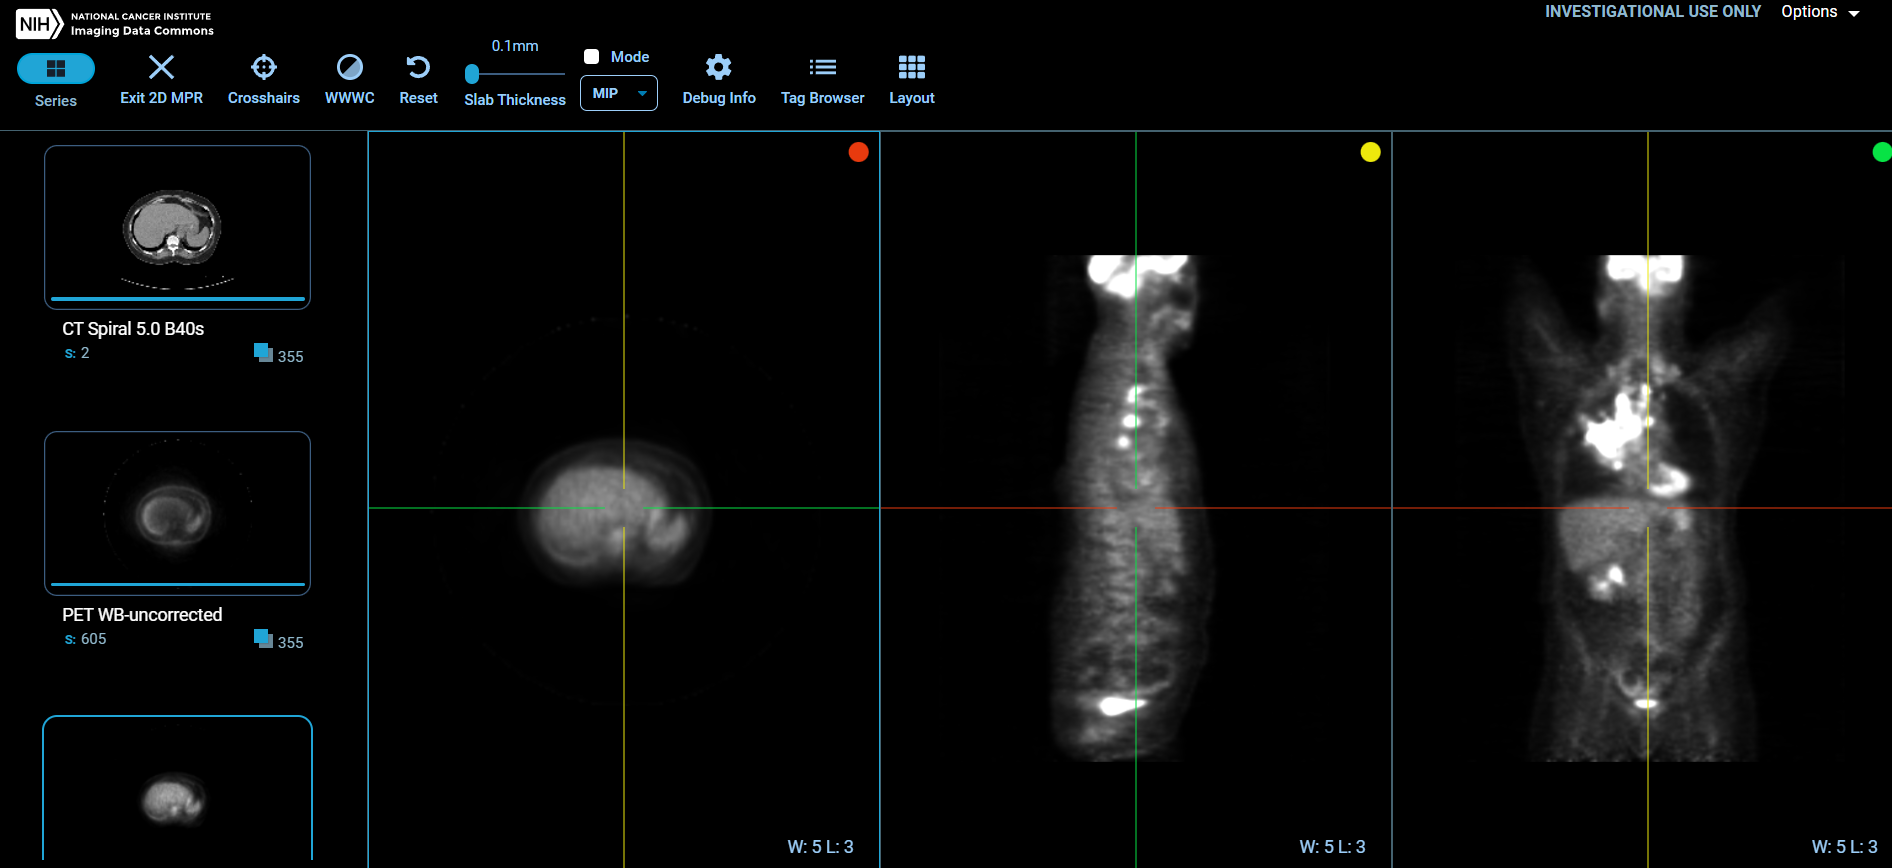

In [ ]:
# Question 3): What does the Slab Thickness slider do?
#

In [ ]:
# TODO: YOUR ANSWER
# Slab Thickness slider controls the number of thickness value or slices used currentlt for visualization.

**Task 4**: Let's access the pixel data! [20 Points]

In [ ]:
# Please EXIT THE 2D MPR.
#
# We will now grab the pixel data of the currently displayed slice
# using the Javascript console.
#

In [ ]:
# 1) Open the Developer Tools of your browser and access the JS console.
#

In [ ]:
# 2) The following code allows to access the pixel data of the slice that
# is currently displayed.
#
# element = cornerstone.getEnabledElements()[0];
# pixels = element.image.getPixelData();
#

In [ ]:
# Question 4): What is the maximum pixel value of the current slice?
#
# Hint: There are multiple ways of doing this according to
# https://medium.com/coding-at-dawn/the-fastest-way-to-find-minimum-and-maximum-values-in-an-array-in-javascript-2511115f8621
#

In [ ]:
# TODO: YOUR ANSWER

In [ ]:
var highest = pixels[0];
for(var i = 1; i < pixels.length; i++) {
    if(highest<pixels[i]) highest = pixels[i];
}

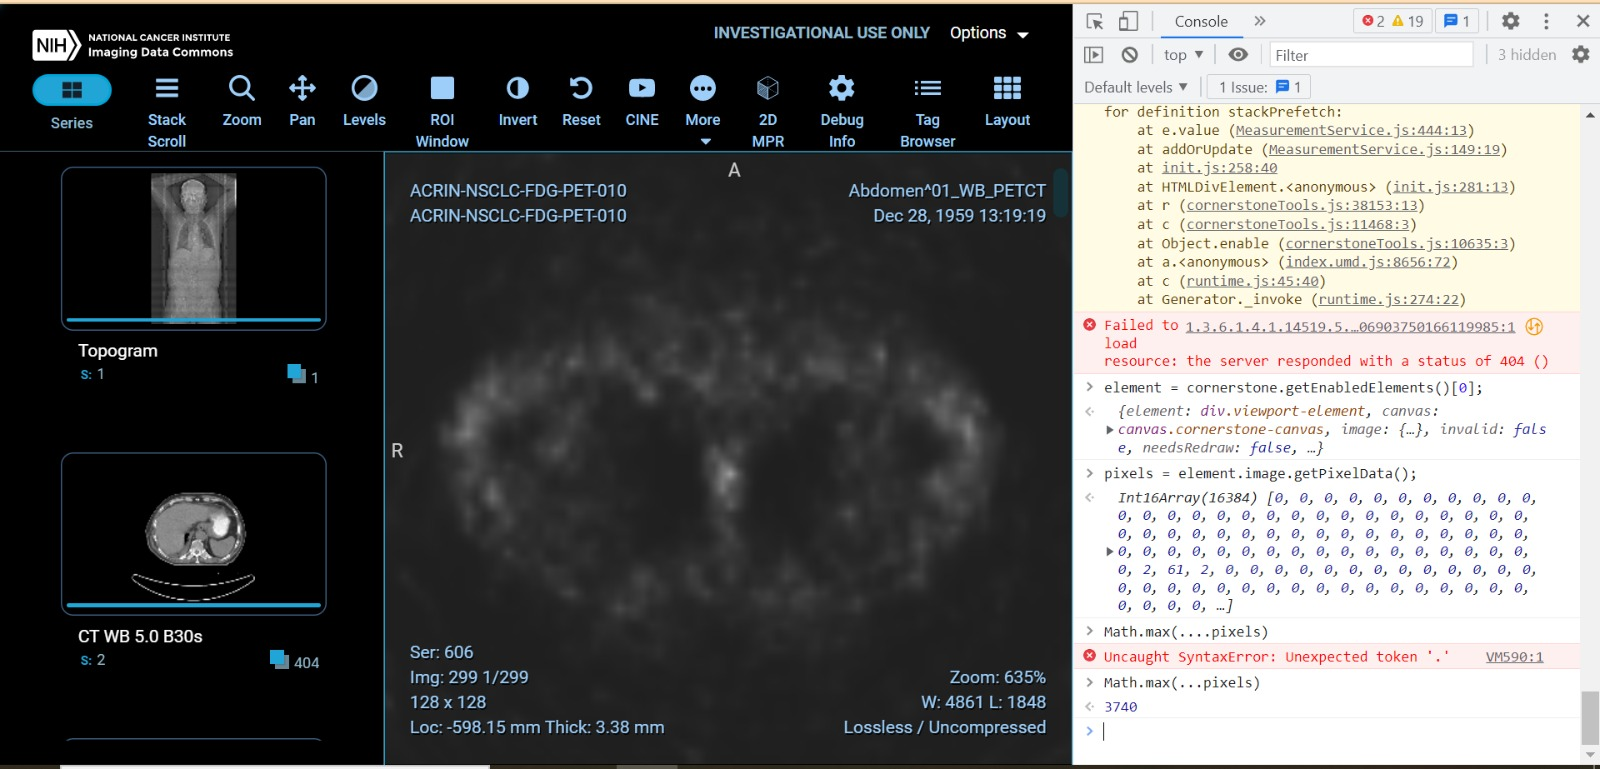

**Bonus**: Apply a filter mask to the current slice! [33 Points]


In [ ]:
# Here we will modify the pixel data!
#
# The following code allows you to set the pixels of the current slice.
#
#   pixels.set(new_pixels);
#
# Write code to APPLY A FILTER MASK to the pixels.
#
# Hint: You can use the following code to get the dimensions of the current slice.
#   w = element.image.width;
#   h = element.image.height;
#
# You can decide which filter mask to apply (e.g., Gaussian blur, edge detection..).
#
# ** IMPORTANT **
# Hint 2: Triggering a REDRAW programmatically might be hard but you can use
# the LEVELS tool to manually trigger a redraw to see filtered pixels.
# ** IMPORTANT **

In [ ]:
#
#
# TODO: YOUR CODE GOES HERE
#
#
element = cornerstone.getEnabledElements()[0];
pixels = element.image.getPixelData();

// Convert Typed Array to Array
var arr = [];
for (var i=0; i<pixels.length; i++) arr[i] = pixels[i];

// 1D array to 2D
function reshape(array, part) {
    var tmp = [];
    for(var i = 0; i < array.length; i += part) {
        tmp.push(array.slice(i, i + part));
    }
    return tmp;
}

// Creating an uniformily valued 2d array
function make_array(len, value) {
    let arr = new Array(len); for (let i=0; i<len; ++i) arr[i] = Array.isArray(value) ? [...value] : value;
    return arr;
}

// 2d Convolution
function conv_2d(kernel, array){
    var result = make_array(array.length, make_array(array[0].length, 0));
    var kRows = kernel.length;
    var kCols = kernel[0].length;
    var rows = array.length;
    var cols = array[0].length;
    // find center position of kernel
    var kCenterX = Math.floor(kCols/2);
    var kCenterY = Math.floor(kRows/2);
    var i, j, m, n, ii, jj;

    //rows
    for(i=0; i < rows; ++i){          
        //columns
        for(j=0; j < cols; ++j){
            //kernel rows
            for(m=0; m < kRows; ++m){
                //kernel columns
                for(n=0; n < kCols; ++n){
                    ii = i + (m - kCenterY);
                    jj = j + (n - kCenterX);
                    // ignore out of bound values
                    if(ii >= 0 && ii < rows && jj >= 0 && jj < cols){
                        result[i][j] += array[ii][jj] * kernel[m][n];
                    };
                };
            };
        };
    };
    return result;
};

// Edge detection: sobel operator
const kernel = [
    [-1,0,1],
    [-1,0,1],
    [-1,0,1],
  ];

//reshape pixels into 2d
var arr2d = reshape(arr, 512);
// Filtering
var out = conv_2d(kernel, arr2d);
// 2d array to 1d array
var arr1d = [].concat(...out);
// Array to Typed Array
new_pixels = Uint16Arraynt.from(arr1d);
// setting new pixels
pixels.set(new_pixels);

In [ ]:
# TODO: Please add a screenshot after filtering the current slice.

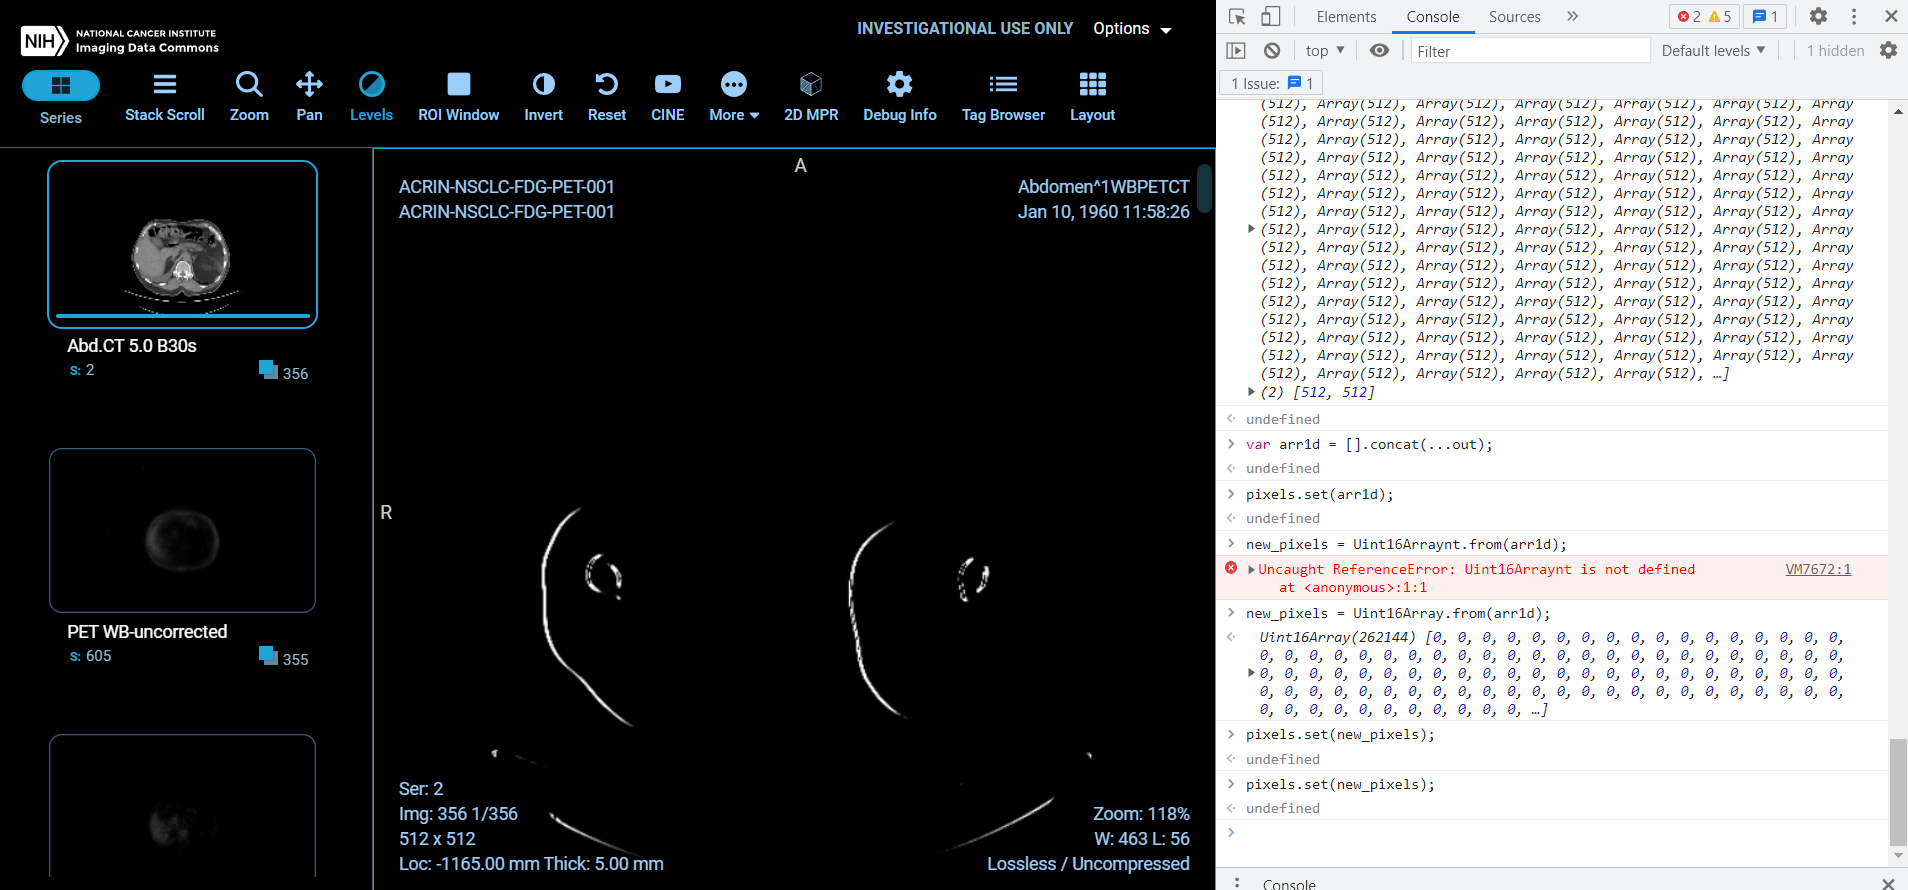

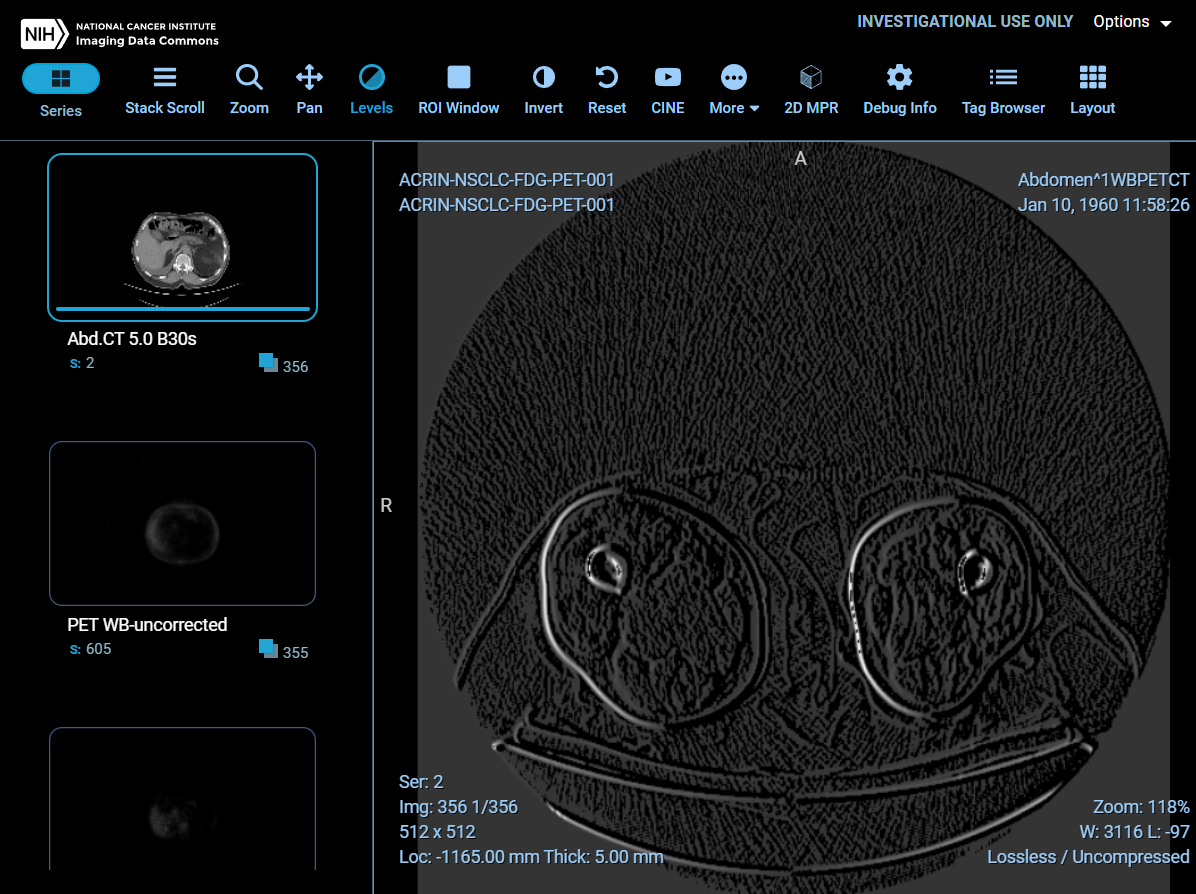

TODO: ADD SCREENSHOT

In [ ]:
#
# SUPER BONUS (+33 extra): Can you trigger the redraw programmatically?
#

In [ ]:
# TODO: YOUR CODE FOR REDRAW GOES HERE

In [ ]:
var t = document.getElementsByClassName("toolbar-button");
# levels is the 3rd button
t[3].click()

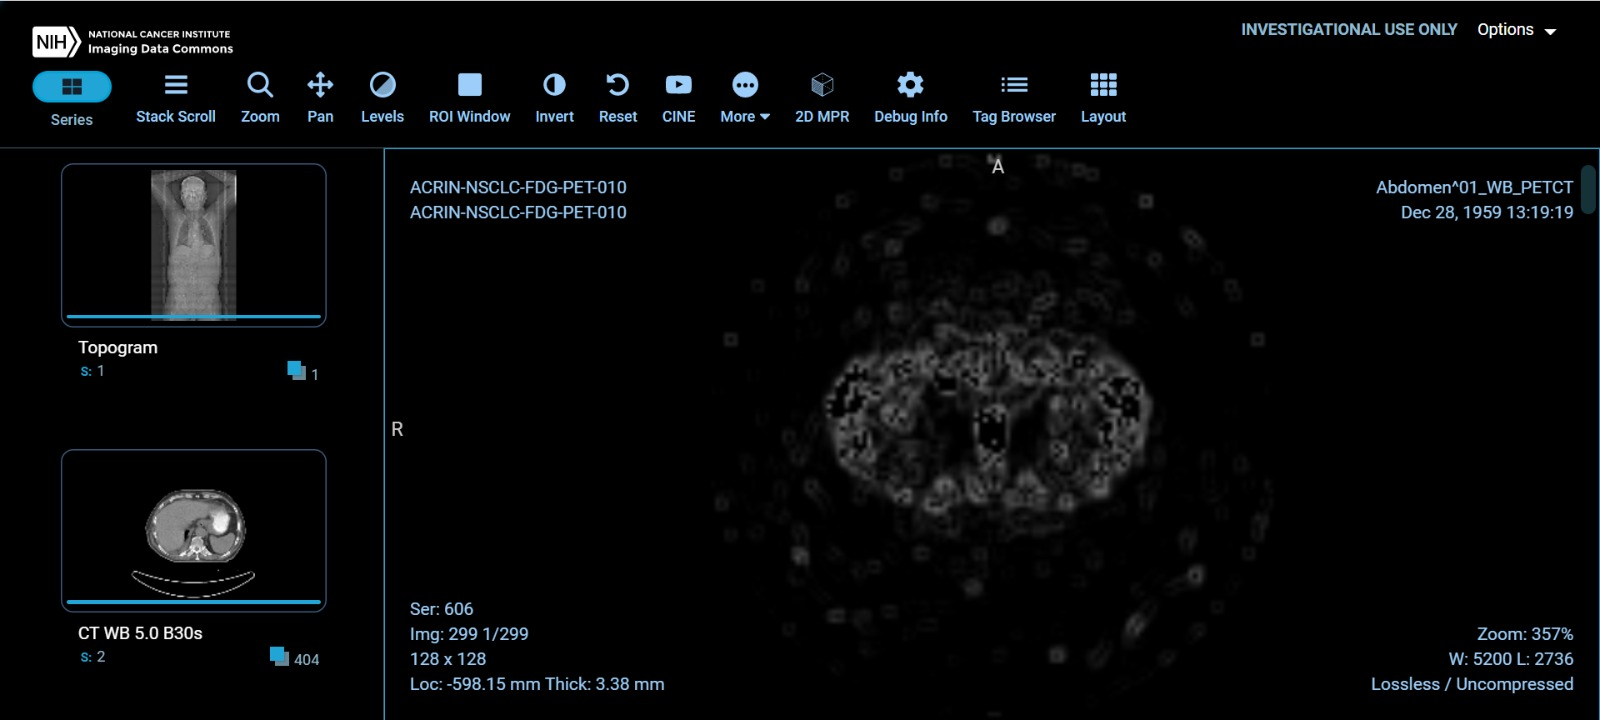

In [ ]:
#
# THANK YOU!!!
#
#       .--..--..--..--..--..--.
#     .' \  (`._   (_)     _   \
#   .'    |  '._)         (_)  |
#   \ _.')\      .----..---.   /
#   |(_.'  |    /    .-\-.  \  |
#   \     0|    |   ( O| O) | o|
#    |  _  |  .--.____.'._.-.  |
#    \ (_) | o         -` .-`  |
#     |    \   |`-._ _ _ _ _\ /
#     \    |   |  `. |_||_|   |
#     | o  |    \_      \     |     -.   .-.
#     |.-.  \     `--..-'   O |     `.`-' .'
#   _.'  .' |     `-.-'      /-.__   ' .-'
# .' `-.` '.|='=.='=.='=.='=|._/_ `-'.'
# `-._  `.  |________/\_____|    `-.'
#    .'   ).| '=' '='\/ '=' |
#    `._.`  '---------------'
#            //___\   //___\
#              ||       ||
#     LGB      ||_.-.   ||_.-.
#             (_.--__) (_.--__)
#
#

# Worked together with Anudeep Reddy Veerla